<a href="https://colab.research.google.com/github/hoangngo1909/Face-Mask-Detection-using-Convolutional-Neural-Networks/blob/main/_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [2]:
tf.__version__

'2.6.0'

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/AI/mask

/content/drive/MyDrive/AI/mask


In [5]:
img = image.load_img("/content/drive/MyDrive/AI/mask/database/training/mask/12.jpg")

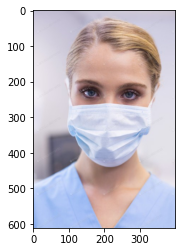

In [6]:
plt.imshow(img)

In [7]:
cv2.imread("/content/drive/MyDrive/AI/mask/database/training/mask/12.jpg").shape

(611, 400, 3)

In [8]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [13]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/AI/mask/database/training/',
                                          target_size = (200, 200),
                                          batch_size = 3,
                                          class_mode = 'binary')
validation_dataset = validation.flow_from_directory('/content/drive/MyDrive/AI/mask/database/validation/',
                                          target_size = (200, 200),
                                          batch_size = 3,
                                          class_mode = 'binary')

Found 40 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [14]:
train_dataset.class_indices

{'mask': 0, 'no_mask': 1}

In [15]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [16]:
model = tf.keras.models.Sequential ([tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape = (200, 200, 3)),
                                     tf.keras.layers.MaxPooling2D(2, 2),
                                     #
                                     tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
                                     tf.keras.layers.MaxPooling2D(2, 2),
                                     #
                                     tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                     tf.keras.layers.MaxPooling2D(2, 2),
                                     ##
                                     tf.keras.layers.Flatten(),
                                     ##
                                     tf.keras.layers.Dense(512, activation='relu'),
                                     ##
                                     tf.keras.layers.Dense(1, activation='sigmoid'),
]    
)

In [23]:
model.compile(loss = 'binary_crossentropy', 
              optimizer =RMSprop(lr=0.001),
              metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [36]:
model.fit(train_dataset,
          steps_per_epoch = 3,
          epochs = 40,
          validation_data = validation_dataset)

Epoch 1/40
3/3 [==============================] - 0s 90ms/step - loss: 0.2372 - accuracy: 0.8571 - val_loss: 0.7629 - val_accuracy: 0.8000
Epoch 2/40
3/3 [==============================] - 0s 79ms/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 0.6481 - val_accuracy: 0.8000
Epoch 3/40
3/3 [==============================] - 0s 68ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.5386 - val_accuracy: 0.8000
Epoch 4/40
3/3 [==============================] - 0s 95ms/step - loss: 0.3006 - accuracy: 0.8889 - val_loss: 0.2072 - val_accuracy: 0.9000
Epoch 5/40
3/3 [==============================] - 0s 96ms/step - loss: 3.0347e-04 - accuracy: 1.0000 - val_loss: 0.2051 - val_accuracy: 1.0000
Epoch 6/40
3/3 [==============================] - 0s 83ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.2119 - val_accuracy: 0.9000
Epoch 7/40
3/3 [==============================] - 0s 74ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.2351 - val_accuracy: 0.9000
Epoch 8/40
3/3 [=======

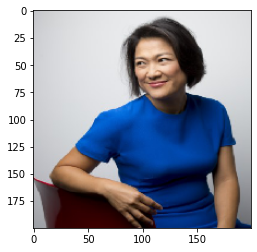

Human with mask


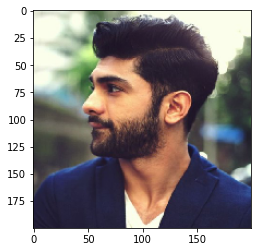

Human with NO mask


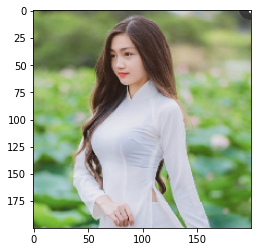

Human with mask


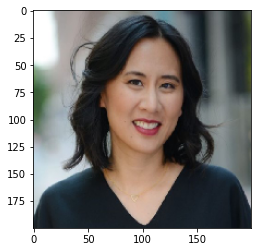

Human with NO mask


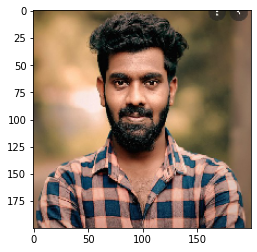

Human with mask


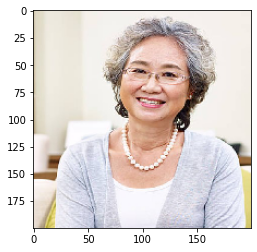

Human with mask


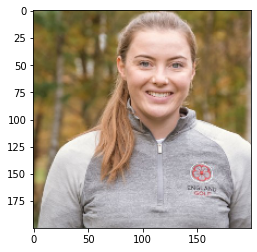

Human with mask


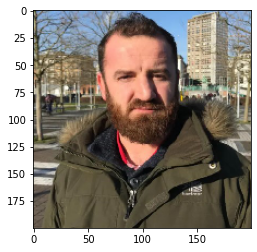

Human with NO mask


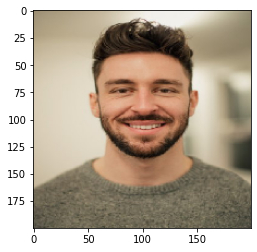

Human with NO mask


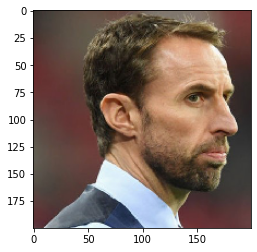

Human with NO mask


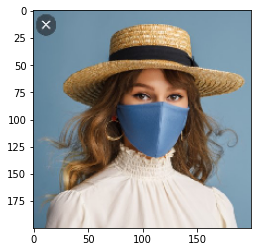

Human with mask


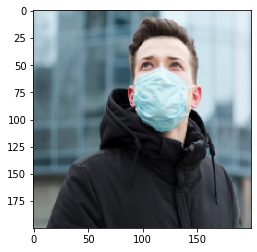

Human with mask


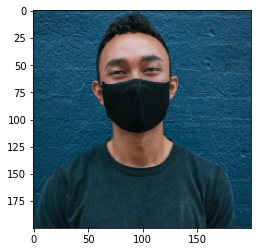

Human with NO mask


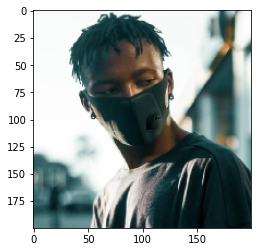

Human with NO mask


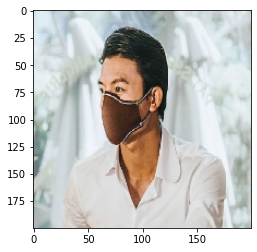

Human with NO mask


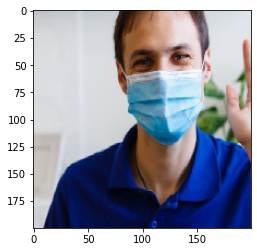

Human with mask


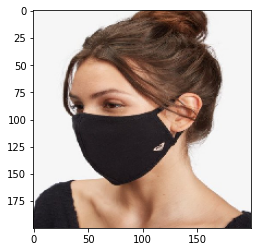

Human with mask


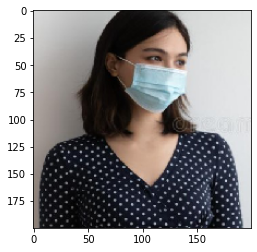

Human with NO mask


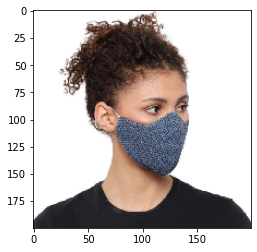

Human with mask


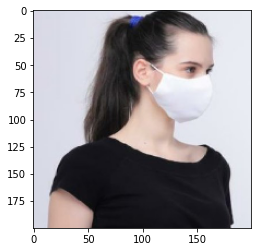

Human with NO mask


In [37]:
dir_path = "/content/drive/MyDrive/AI/mask/database/testing"
for i in os.listdir(dir_path):
  img = image.load_img(dir_path+'//'+i, target_size=(200, 200))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X, axis=0)
  images = np.vstack([X])
  result = model.predict(images)
  if result == 0:
    print("Human with mask")
  else:
    print("Human with NO mask")